# A4 Face Detection and Recognition 
Student Name: Fulin Huang 

Student ID: 260740689 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
import os

## 1 Data Aquisition 

#### Test Image 

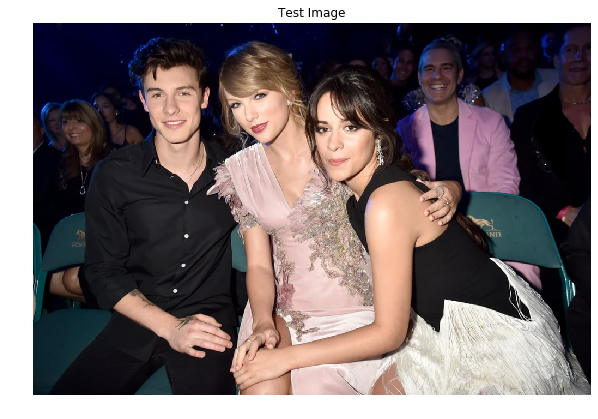

((-0.5, 1023.5, 681.5, -0.5), None)

In [2]:
# Image Reference:https://www.popsugar.com/celebrity/photo-gallery/44850420/image/44865671/Shawn-Mendes-Taylor-Swift-Camila-Cabello
test_image = cv2.imread('test.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(test_image),plt.title("Test Image")
plt.axis('off'), plt.show()

#### Training Images 

#### 1 Describe how you selected the images with respect to the conditions of the detection/recognition methods

I resized the training images to (128, 128) and convert the color to grayscale to make computation more efficient. The reason to make the images the same color and same dimension is for data consistency. It also helps making the computation eaiser in later steps. 

#### Show at least 5 example images for each individual

----- Training Images -----
There are three celebrities in training images:
    Taylor Swift
    Shane Mendes
    Camila Cabello
All training images are collected from Google Images


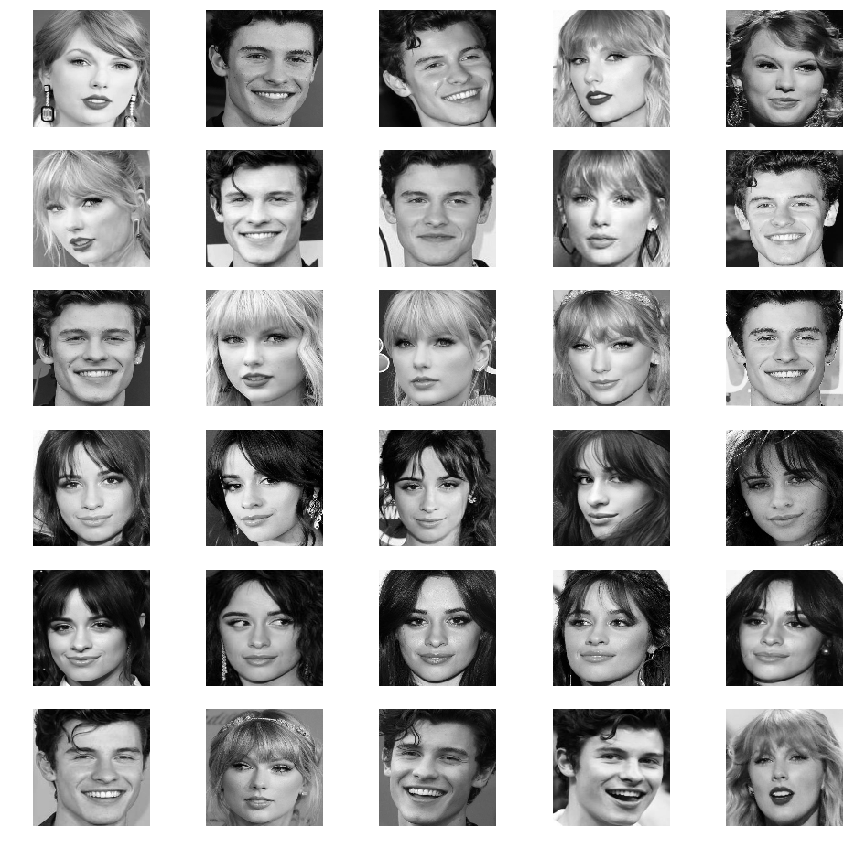

In [3]:
entry = os.listdir('Training_Image')

size = (128, 128)

# Append and Resize Image 
image_list = [] 
for file in entry: 
    image = cv2.imread('./Training_Image/' + file)
    image_1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_1 = cv2.resize(image_1, size)
    image_list.append(image_1)
    
plt.figure(figsize=(15,15))

# TODO: Proper refer- encing is required.

print("----- Training Images -----")
print("There are three celebrities in training images:")
print("    Taylor Swift")
print("    Shane Mendes")
print("    Camila Cabello")
print("All training images are collected from Google Images")
for i in range (0, len(image_list)): 
    plt.subplot(6, 5, i+1) 
    plt.axis('off')
    plt.imshow(image_list[i], cmap='gray')

## 2 Eigenface Representation

#### 1 Produce and eigenface representation for your training data through PCA

[0. 0. 0. ... 0. 0. 0.]
image vector is  [100 100 100 ... 115 115 113]
image vector is  [14 13 13 ... 86 86 85]
image vector is  [ 31  33  32 ... 120 114  97]
image vector is  [220 220 221 ... 159 194 145]
image vector is  [151 150 144 ...  55  31  22]
image vector is  [151 148 145 ... 199 198 197]
image vector is  [ 39  35  53 ... 175 177 177]
image vector is  [220 219 219 ... 227 228 228]
image vector is  [ 64  64  62 ... 145 130 161]
image vector is  [32 30 33 ... 29 32 32]
image vector is  [71 29 22 ... 62 61 60]
image vector is  [108 109 109 ... 180 145 145]
image vector is  [ 51  51  51 ... 184 179 192]
image vector is  [181 197 197 ... 149 152 142]
image vector is  [214 122  43 ... 179 184 190]
image vector is  [248 250 250 ...  77  81  79]
image vector is  [ 84  88  89 ... 141 131 120]
image vector is  [123 119 134 ...  56  61  62]
image vector is  [64 61 56 ... 11 16 13]
image vector is  [169 202 223 ...  13  20   9]
image vector is  [49 54 48 ... 10 11 12]
image vector is  [6

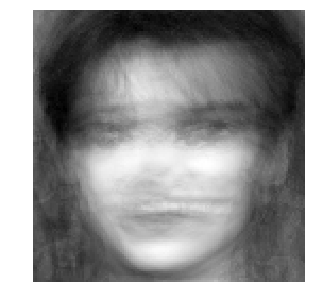

Matrix has shape:  (16384, 30)
cov matrix  (30, 30)
Eigen pair  [(14267.391665299057, array([-0.02306799, -0.19661107, -0.10113748,  0.01468714,  0.13863818,
        0.04667474, -0.21907673, -0.31125924,  0.01606233, -0.03989736,
       -0.14820173,  0.16905325,  0.04676493,  0.08341062, -0.32648793,
        0.18749265,  0.12889591,  0.0566973 ,  0.14493173,  0.2595558 ,
        0.10793128,  0.08143805,  0.1188839 ,  0.19495307,  0.24655649,
       -0.33398249,  0.03366847, -0.16896686, -0.40264632,  0.19503937])), (10218.892437118286, array([-0.03982742, -0.04202411,  0.08765873, -0.20788154, -0.0005357 ,
       -0.1956254 ,  0.12634262, -0.02327399, -0.07036845,  0.3462334 ,
        0.12066608, -0.4077314 , -0.16852776, -0.13846406,  0.04186485,
        0.08582305,  0.18646361,  0.17290841, -0.04396151,  0.0480373 ,
        0.14534169,  0.2540684 ,  0.12081408,  0.216679  ,  0.22584117,
       -0.07568015, -0.25470612, -0.00820031, -0.07085848, -0.431076  ])), (5586.982992859941, arr

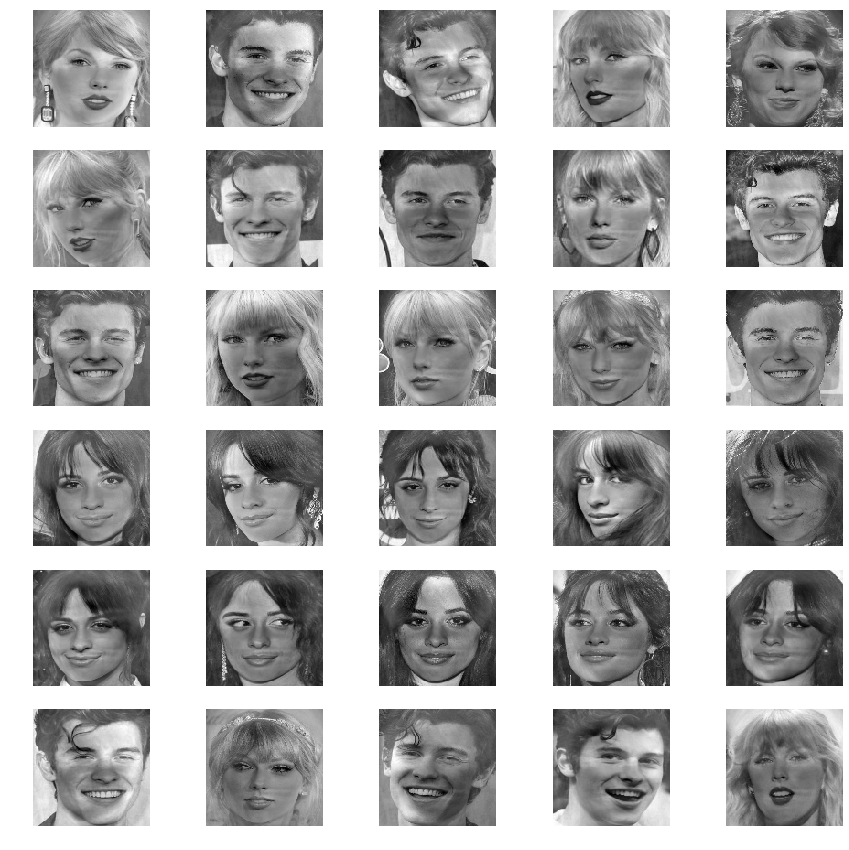

In [4]:
#Check this: https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/
# And this: https://towardsdatascience.com/eigenfaces-recovering-humans-from-ghosts-17606c328184
# SVD: https://medium.com/machine-learning-world/linear-algebra-svd-and-pca-5979f739e95a
# eigenface: chrome-extension://cbnaodkpfinfiipjblikofhlhlcickei/src/pdfviewer/web/viewer.html?file=http://www.vision.jhu.edu/teaching/vision08/Handouts/case_study_pca1.pdf
# http://laid.delanover.com/explanation-face-recognition-using-eigenfaces/

image_vector_list = [] 
image_sum = np.zeros(shape=(128,128)).ravel()
                    
print(image_sum)
for image in image_list: 
    # Obtain face images 
    # Represent image image as a vector 
    image_vector = image.reshape(128,128).ravel()
    print("image vector is ", image_vector)
    image_sum += image_vector 
    image_vector_list.append(image_vector)

# Compute average face vector 
average_face = (image_sum/len(image_list)).ravel()
print("Average face is ", average_face)
average_face_image = average_face.reshape(128,128)
plt.figure(figsize=(5,5))
plt.imshow(average_face_image, cmap='gray'), plt.axis('off'), plt.show()

# Normalize the training set 
new_image_vector_list = []
for image_vector in image_vector_list: 
    image_vector = np.subtract(image_vector, average_face).ravel()
    new_image_vector_list.append(image_vector)

# Display average faces 
plt.figure(figsize=(15,15))
for i in range (0, len(new_image_vector_list)): 
    plt.subplot(6, 5, i+1) 
    plt.axis('off')
    plt.imshow(new_image_vector_list[i].reshape(128, 128), cmap='gray')    



# Calculate Covariance C = AA^T
# Step 1) Concatenate vectors into a matrix 
image_matrix = np.zeros(shape=(128*128, 1))
image_matrix = new_image_vector_list[0]
for i in range(1, len(new_image_vector_list)): 
    b = new_image_vector_list[i]
    image_matrix = np.column_stack((image_matrix, b))    

print("Matrix has shape: ", image_matrix.shape)

# Step 2) Calculate Covariance 
cov_matrix = np.cov(image_matrix.T)
print("cov matrix ", cov_matrix.shape)

# Compute the eigenvector and eigenvalue 
eigenvalue, eigenvector = np.linalg.eig(cov_matrix) 

# Sort eigenvector and eigenvalue 

# Make eigen-pair 
eigen_pair = [(np.abs(eigenvalue[i]), eigenvector[:,i]) for i in range(len(eigenvalue))]
print("Eigen pair ", eigen_pair)

# Sort eigen-pair 
eigen_pair.sort(key=lambda x:x[0], reverse=True)

num_pair = len(eigen_pair)

# Variance captured by eah component 
tot = sum(eigenvalue)
var_exp = [(i/tot)*100 for i in sorted(eigenvalue, reverse=True)]
print("var exp ", var_exp)

# Total (Cumulative) sum 
cum_sum = np.cumsum(var_exp)
cum_sum_reverse = np.flipud(cum_sum)
print(cum_sum)

k = 7  # Eigenvector Number used for calculation 
# Create a matrix correspond to the eigenvectors 
chosen_eigen_pair = eigen_pair[0][1].reshape(30,1)
for i in range(1, 7): 
    print(i)
    b = eigen_pair[i][1].reshape(30,1)
    print("chosen ", chosen_eigen_pair)
    chosen_eigen_pair = np.hstack((chosen_eigen_pair, b))

new_matrix = chosen_eigen_pair
print(chosen_eigen_pair.shape)

eigenface = image_matrix.dot(new_matrix)

print(eigenface.shape)


# From Eigenface Wiki 
# https://en.wikipedia.org/wiki/Eigenface
# 1) Each image is treated as one vector (r*c)

# 2) Store all images of training set in a single matrix T,
#    where each column of the matrix is an image 

# 3) Subtract the mean. The average image a has to be calculated and
#    then subtracted from each original image in T
    
# 4) Calculate the eigenvectors and eigenvalues of the covariance
#    matrix S

# 5)Choose the principal components 

# 6) K is the smallest number that satisfies ... 


# https://www.youtube.com/watch?v=uFbDWu0tDrE
# Also check this: https://plot.ly/python/v3/ipython-notebooks/principal-component-analysis/# Standardize the data 

# Standardize the data 
# -> x_std

# To find out covariance, use: 
# np.cov()

# To find out eigenvalue, vector, use: 
# eig_vals, eig_vecs = np.linalg.eig(a covaraince matrix) 


# To sort eigenvalue and eigenvector 

    # Make a list of (eigvalue, eigvector) tuple
    # eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    
    # Sort the (eigvalue, eigvector) tuples from high to low 
#      eig_pairs.sort(key=lambda x:x[0], reverse=True)
    
# Variance captured by eah component 
# tot = sum(eig_vals)
# var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]

# Cumulative variance captured as we travel each component 
#cum_var_exp = np.cumsum(var_exp)

# Depend on the cumulative variance, we can see k components contribute to the data most 

# Create a matrix W that corresond to the eigenvectors of the top most eigenvalues 
# matrix_w = np.hstack((eig_pairs[x][x].reshape(4,1),
#                       eig_pairs[x][x].reshape(4,1)))

# Whatever data I have, I projected onto those eigenvectors 
# y = x_std.dot(matrix_w)
 

#### 2 Plot the variance against the eigenvector number in descending order (i.e. total variance vs. number of principal components)

Cumulative sum:  [100.         100.          99.27738036  98.45273556  97.58642738
  96.62842725  95.64560679  94.58994883  93.47871406  92.34838466
  91.1619875   89.85500911  88.42636842  86.98763276  85.43267507
  83.83627041  82.09577983  80.23598905  78.26340681  76.12707843
  73.71034854  71.03607648  67.96406441  64.6319879   61.12162409
  55.95028692  49.54763706  42.80688628  34.85426361  20.30848895]
Number of Eigenvector  30


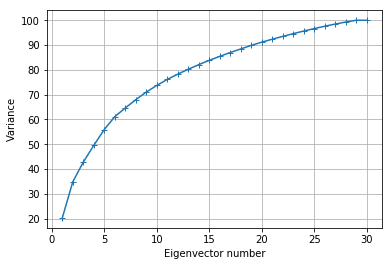

In [5]:
print("Cumulative sum: ", cum_sum_reverse)
print("Number of Eigenvector ", num_pair)

# Plot Diagram     
plt.xlabel("Eigenvector number")
plt.ylabel("Variance")
x = (np.arange(num_pair, 0, -1))
plt.plot(x, cum_sum_reverse, marker='+')
plt.grid(True)
plt.show() 

#### 3  Plot the total variance against the eigenvector number used for computation

Total Variance in reverse order  [64.6319879  61.12162409 55.95028692 49.54763706 42.80688628 34.85426361
 20.30848895]


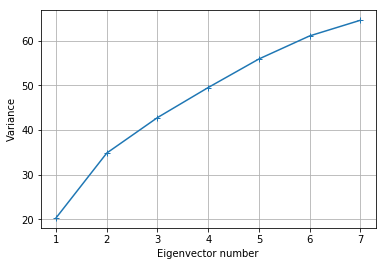

In [6]:
y = cum_sum[:k]
y = np.flipud(y)
print("Total Variance in reverse order ", y)

# Plot Diagram     
plt.xlabel("Eigenvector number")
plt.ylabel("Variance")
x = (np.arange(k, 0, -1))
plt.plot(x, y, marker='+')
plt.grid(True)
plt.show() 
          

#### 4 Do you need all the vectors to represent the data? Discuss

In [7]:
# TODO 

#### 5 Display the first 5 eigenfaces

(16384, 7)


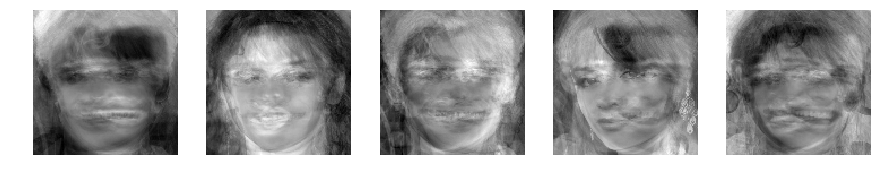

In [8]:
print(eigenface.shape)

num_eigenface = 5

plt.figure(figsize=(15,15))
for i in range (0, num_eigenface): 
    plt.subplot(1, 5, i+1) 
    plt.axis('off')
    plt.imshow(eigenface[:,i].reshape(128, 128), cmap='gray')    


## 3 Neighbourhood Clustering

#### 1 For every training image, find the nearest neighbour (L2 distance), and check whether both images belong to the same person. 

In [9]:
image1 = image_list[0]
for i in range(1, len(image_list)): 
    l2_distance = cv2.norm(image1, image_list[1], cv2.NORM_L2)
    print(l2_distance)
    image1 = image_list[i]
    
# https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

9859.984432036392
0.0
7386.524419508813
10541.054169294455
9388.23561698363
11527.838088731121
8362.235167704865
10604.385837944601
8313.678728457096
9627.340754330866
6356.5829657135755
12930.470873096618
10025.211967833897
9873.60390131182
10447.110557469945
9816.276075987269
11043.457248525028
10433.861940815586
9410.006004248882
10463.529184744504
9999.696645398799
9339.349067253028
8439.689153043493
10484.856985195363
10688.173557722574
7415.294464820666
8798.719509110402
8201.17900060717
9306.237800529278


#### 2 What fraction of your data has a neighbour that is of the same person?

#### 3 Do this both in the original high dimensional pixel space and then in the eigenspace, and compare the accuracy values. 

#### 4 Would you expect there to be a significant difference?

## 4 Face Detection & Recognition

#### 1 Display your image with bounding boxes around detected faces for your best threshold

#### 2 For the windows in which a face is correctly detected, project the contents of the window to your eigenspace and find the nearest neighbour from your data. The identity of the detected face will be based on the identity of the closest person in the training set

#### 3 How well does the method work? How many false positive face detections do you get?

#### 4 For mis-identified faces, report the number of neighbours you need before getting the correct label (correct identification would use 1)

#### 5 In which situations would expect the approach to fail, and what could you do to improve it?